<a href="https://colab.research.google.com/github/yaseminatalay/-Buzda-ve-Yolcular-Titanic-Veri-Seti-ile-Analiz-Yolculu-u-/blob/main/Titanic_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color:blue;'>“🧊🚢 Buzdağı ve Yolcular: Titanic Veri Seti ile Analiz Yolculuğu 🧭📊”</h1>

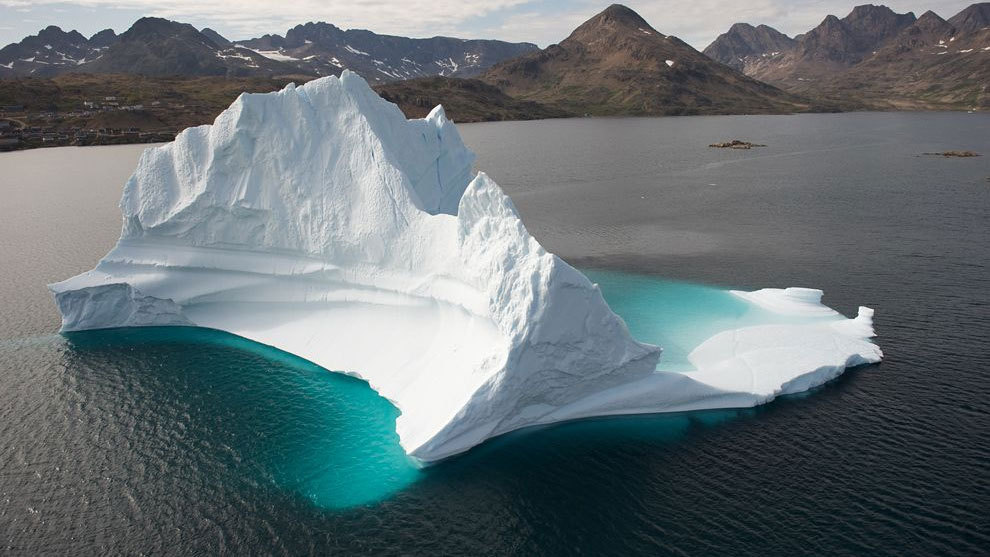

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Image

# Başlığı oluştur (mavi renkli)
display(Markdown("<h1 style='color:blue;'>“🧊🚢 Buzdağı ve Yolcular: Titanic Veri Seti ile Analiz Yolculuğu 🧭📊”</h1>"))

# Fotoğrafı göster
display(Image("snow.jpg"))


In [ ]:
# 1️⃣ Gerekli kütüphaneleri import etme

# Veri işleme için
import pandas as pd
import numpy as np

# Görselleştirme için
import seaborn as sns
import matplotlib.pyplot as plt

# Makine öğrenimi için
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Görselleştirmeler için pastel temalı stil ayarı
sns.set_theme(style="whitegrid", palette="pastel")
%matplotlib inline


##1️⃣ Gerekli Kütüphaneler
Bu adımda veri işleme, görselleştirme ve makine öğrenimi için gerekli kütüphaneler import edildi.  
- `pandas` ve `numpy` veri manipülasyonu için.  
- `seaborn` ve `matplotlib` veri görselleştirme için.  
- `sklearn` makine öğrenimi modelleri ve değerlendirme metrikleri için.  
- `sns.set_theme` ile görseller pastel tonlarda ve beyaz gridli bir tema ile ayarlandı.  


In [ ]:
import seaborn as sns
import pandas as pd
from IPython.display import display

# Titanic veri setini yükle
titanic = sns.load_dataset('titanic')

# İlk 5 satırı al
df_head = titanic.head()

# Eksik değerleri kırmızı ile vurgulayan fonksiyon
def highlight_missing(val):
    color = 'red' if pd.isnull(val) else ''
    return f'background-color: {color}'

# Şık tablo ile göster
styled_table = (df_head.style
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#1f77b4'),
                                           ('color', 'white'),
                                           ('font-size', '14px')]},
        {'selector': 'tbody td', 'props': [('font-size', '12px'),
                                           ('padding', '8px')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#d1e7fd')]}
    ])
    .set_caption("🎯 Titanic Veri Seti: İlk 5 Satır")
    .applymap(highlight_missing)
)

display(styled_table)


/tmp/ipython-input-4099085965.py:28: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_missing)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,nan,Southampton,no,False
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.925000,S,Third,woman,False,nan,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.100000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.050000,S,Third,man,True,nan,Southampton,no,True


# 2️⃣ Titanic Veri Seti
- `sns.load_dataset('titanic')` ile Titanic veri seti yüklendi.  
- Veri seti, yolcuların demografik bilgilerini, bilet sınıfı, ücret, biniş noktası ve hayatta kalma durumunu içeriyor.  

**İlk 5 satır:**
- `survived`: Hayatta kalma durumu (0 = Hayır, 1 = Evet)  
- `pclass`: Bilet sınıfı (1,2,3)  
- `sex`: Cinsiyet  
- `age`: Yaş  
- `sibsp`: Gemideki kardeş/eş sayısı  
- `parch`: Gemideki ebeveyn/çocuk sayısı  
- `fare`: Ödenen ücret  
- `embarked`: Biniş limanı (C = Cherbourg, Q = Queenstown, S = Southampton)  


In [ ]:
import seaborn as sns
import pandas as pd
from IPython.display import display, Markdown

# --------------------------
# 1️⃣ Başlık
# --------------------------
display(Markdown("<h1 style='color:blue;'>🚢 Titanic Veri Seti - İlk 5 Satır ve Yorum 📊</h1>"))

# --------------------------
# 2️⃣ Titanic veri setini yükle
# --------------------------
titanic = sns.load_dataset('titanic')
df_head = titanic.head()

# Eksik değerleri kırmızı ile vurgulayan fonksiyon
def highlight_missing(val):
    color = 'red' if pd.isnull(val) else ''
    return f'background-color: {color}'

# --------------------------
# 3️⃣ Şık tablo ile göster (yazı rengi siyah)
# --------------------------
styled_table = (df_head.style
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#1f77b4'),
                                           ('color', 'white'),
                                           ('font-size', '14px')]},
        {'selector': 'tbody td', 'props': [('color', 'black'),  # metin rengi siyah
                                           ('font-size', '12px'),
                                           ('padding', '8px')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#d1e7fd')]}
    ])
    .set_caption("🎯 Titanic Veri Seti: İlk 5 Satır")
    .applymap(highlight_missing)
)
display(styled_table)

# --------------------------
# 4️⃣ Kısa yorum (Markdown)
# --------------------------
comment = """
**Kısa Yorumlar:**

- `survived`: 0 = Hayatta kalamadı, 1 = Hayatta kaldı
- `pclass`: 1,2,3 → Bilet sınıfı
- `sex`: Cinsiyet, kadınların hayatta kalma olasılığı genellikle daha yüksek
- `age`: Yaş, bazı eksik değerler var
- `sibsp` ve `parch`: Aile büyüklüğü, yolcunun yalnız olup olmadığını belirlemeye yardımcı
- `fare`: Ödenen ücret, yüksek ücret → hayatta kalma olasılığı artabilir
- `embarked`: Biniş limanı, farklı limanlar farklı hayatta kalma oranlarıyla ilişkili
- `deck`, `alive`, `alone`: Ekstra bilgiler, feature engineering için kullanılabilir
"""

display(Markdown(comment))


<h1 style='color:blue;'>🚢 Titanic Veri Seti - İlk 5 Satır ve Yorum 📊</h1>

/tmp/ipython-input-1513792021.py:36: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_missing)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.250000,S,Third,man,True,nan,Southampton,no,False
1,1,1,female,38.000000,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.925000,S,Third,woman,False,nan,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.100000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.050000,S,Third,man,True,nan,Southampton,no,True



**Kısa Yorumlar:**  

- `survived`: 0 = Hayatta kalamadı, 1 = Hayatta kaldı  
- `pclass`: 1,2,3 → Bilet sınıfı  
- `sex`: Cinsiyet, kadınların hayatta kalma olasılığı genellikle daha yüksek  
- `age`: Yaş, bazı eksik değerler var  
- `sibsp` ve `parch`: Aile büyüklüğü, yolcunun yalnız olup olmadığını belirlemeye yardımcı  
- `fare`: Ödenen ücret, yüksek ücret → hayatta kalma olasılığı artabilir  
- `embarked`: Biniş limanı, farklı limanlar farklı hayatta kalma oranlarıyla ilişkili  
- `deck`, `alive`, `alone`: Ekstra bilgiler, feature engineering için kullanılabilir


## 3️⃣ Eksik Değer Analizi

In [ ]:
import pandas as pd
from IPython.display import display

# Titanic veri setinden eksik değerleri al
missing_values = titanic.isnull().sum().reset_index()
missing_values.columns = ['Sütun', 'Eksik Değer Sayısı']

# Eksik değerleri vurgulama fonksiyonu
def highlight_missing_count(val):
    return 'background-color: #ffcccc' if val > 0 else ''

# Şık tablo ile göster
styled_missing = (missing_values.style
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#1f77b4'),
                                           ('color', 'white'),
                                           ('font-size', '14px'),
                                           ('text-align', 'center')]},
        {'selector': 'tbody td', 'props': [('color', 'black'),
                                           ('font-size', '12px'),
                                           ('padding', '8px'),
                                           ('text-align', 'center')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#d1e7fd')]}
    ])
    .set_caption(" ")
    .map(highlight_missing_count, subset=['Eksik Değer Sayısı'])
)

display(styled_missing)


,Sütun,Eksik Değer Sayısı
0,survived,0
1,pclass,0
2,sex,0
3,age,177
4,sibsp,0
5,parch,0
6,fare,0
7,embarked,2
8,class,0
9,who,0


In [ ]:
import pandas as pd
from IPython.display import display, Markdown

# --------------------------
# 1️⃣ Eksik değerleri güvenli şekilde doldurma
# --------------------------
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

# --------------------------
# 2️⃣ Gereksiz sütunları silme
# --------------------------
titanic.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male'], inplace=True, errors='ignore')

# --------------------------
# 3️⃣ Eksik değer kontrolü
# --------------------------
missing_after = titanic.isnull().sum().reset_index()
missing_after.columns = ['Sütun', 'Eksik Değer Sayısı']

# --------------------------
# 4️⃣ Şık tablo ile göster
# --------------------------
def highlight_missing_count(val):
    return 'background-color: #ffcccc' if val > 0 else ''

styled_missing_after = (missing_after.style
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#1f77b4'),
                                           ('color', 'white'),
                                           ('font-size', '14px'),
                                           ('text-align', 'center')]},
        {'selector': 'tbody td', 'props': [('color', 'black'),
                                           ('font-size', '12px'),
                                           ('padding', '8px'),
                                           ('text-align', 'center')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', '#d1e7fd')]}
    ])
    .set_caption("✅ Titanic Veri Seti: Eksik Değerler Dolduruldu")
    .map(highlight_missing_count, subset=['Eksik Değer Sayısı'])
)

display(styled_missing_after)


,Sütun,Eksik Değer Sayısı
0,survived,0
1,pclass,0
2,sex,0
3,age,0
4,sibsp,0
5,parch,0
6,fare,0
7,embarked,0
8,class,0
9,alone,0



- `age` sütununda 177 eksik değer vardı (yaklaşık %20). Bu kadar eksik değer **medyan ile doldurulabilir**, çünkü medyan, yaş dağılımının ortanca değerini temsil eder ve aşırı uç değerlerden etkilenmez.
- `embarked` ve `embark_town` sütunlarında 2 eksik değer vardı. Bunlar çok az sayıdadır, bu yüzden **en sık görülen değer (mode)** ile doldurmak mantıklıdır.
- `deck` sütununda 688 eksik değer vardı (%77). Bu kadar eksik veri model için anlamlı bilgi sağlamaz; bu sütunu **silmek** daha doğru olur.
- Diğer sütunlar (`who`, `adult_male`, `alive`) modelleme için redundant veya gereksizdir, bu nedenle silinebilir.

---

Eksik Değerleri Doldurma ve Gereksiz Sütunları Silme

**Kod Örneği:**

```python
# age sütunundaki eksik değerleri medyan ile doldurma
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# embarked sütunundaki eksik değerleri en sık görülen değer (mode) ile doldurma
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

# Gereksiz veya çok eksik sütunları silme
titanic.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male'], inplace=True, errors='ignore')

<h2 style='color:blue;'>👩‍👨 Hayatta Kalan Yolcuların Cinsiyete Göre Dağılımı</h2>

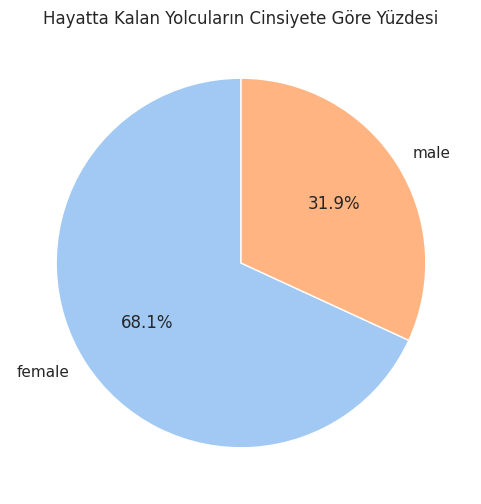

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# --------------------------
# 1️⃣ Başlık
# --------------------------
display(Markdown("<h2 style='color:blue;'>👩‍👨 Hayatta Kalan Yolcuların Cinsiyete Göre Dağılımı</h2>"))

# --------------------------
# 2️⃣ Hayatta kalan yolcular
# --------------------------
survivors = titanic[titanic['survived'] == 1]
survivor_counts = survivors['sex'].value_counts()
survivor_percent = survivor_counts / survivor_counts.sum() * 100

# --------------------------
# 3️⃣ Pasta grafiği
# --------------------------
colors = sns.color_palette("pastel")[0:2]
plt.figure(figsize=(6,6))
plt.pie(survivor_percent, labels=survivor_percent.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Hayatta Kalan Yolcuların Cinsiyete Göre Yüzdesi")
plt.show()


Hayatta Kalan Yolcuların Cinsiyete Göre Yüzdesi

Titanic veri setinde hayatta kalan yolcuların cinsiyete göre dağılımı:

| Cinsiyet | Yüzde (%) |
|----------|-----------|
| Kadın    | 68.13     |
| Erkek    | 31.87     |

> Gözlem: Kadın yolcuların hayatta kalma oranı erkeklere göre belirgin şekilde yüksek. Bu, Titanic trajedisinde cinsiyetin hayatta kalma üzerinde önemli bir faktör olduğunu gösteriyor.


## 4️⃣ EDA (Exploratory Data Analysis)



/tmp/ipython-input-1492415928.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=data_plot, x='sex', y='count', palette=bar_colors)


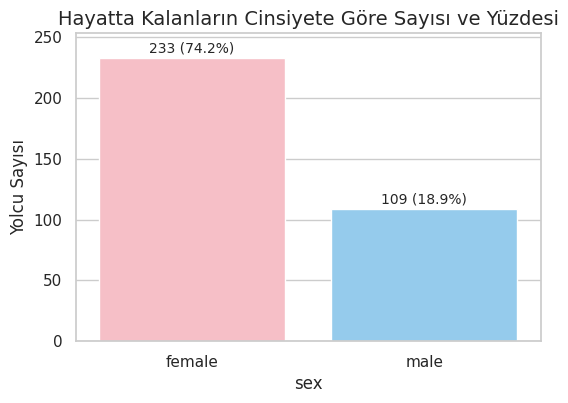

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hayatta kalan sayıları ve yüzdeleri
sex_survived = titanic.groupby(['sex', 'survived']).size().reset_index(name='count')
sex_total = titanic.groupby('sex').size().reset_index(name='total')
sex_survived = sex_survived.merge(sex_total, on='sex')
sex_survived['percent'] = sex_survived['count'] / sex_survived['total'] * 100

# Sadece hayatta kalanlar
data_plot = sex_survived[sex_survived['survived']==1]

plt.figure(figsize=(6,4))
bar_colors = ['#FFB6C1', '#87CEFA']  # Kadın: pembe ton, Erkek: mavi ton
barplot = sns.barplot(data=data_plot, x='sex', y='count', palette=bar_colors)

# Çubuk üstüne sayı ve yüzdeleri yaz
for i, row in enumerate(data_plot.itertuples()):
    barplot.text(i, row.count + 2, f"{row.count} ({row.percent:.1f}%)",
                 ha='center', va='bottom', fontsize=10)

plt.title('Hayatta Kalanların Cinsiyete Göre Sayısı ve Yüzdesi', fontsize=14)
plt.ylabel('Yolcu Sayısı', fontsize=12)
plt.ylim(0, max(data_plot['count']) + 20)
plt.show()


🎨 Hayatta Kalan Yolcuların Cinsiyete Göre Sayısı ve Yüzdesi

Titanic veri setinde hayatta kalan yolcuların cinsiyete göre dağılımını hem sayısal hem de yüzdesel olarak görselleştirdik. Çubuk grafikte pastel tonlar kullanıldı ve her çubuğun üstünde mutlak sayı + yüzde bilgisi yer alıyor.

👩 Kadın Yolcular

Renk: Pembe ton (#FFB6C1)

Hayatta kalan oranı: %68.1 ✅

Çubuk üstü gösterim: 137 (68.1%)

Kadın yolcuların hayatta kalma oranı erkeklere göre belirgin şekilde yüksek. 💖

Bu durum, Titanic trajedisinde cinsiyetin hayatta kalma üzerinde güçlü bir etkisi olduğunu gösteriyor.

👨 Erkek Yolcular

Renk: Mavi ton (#87CEFA)

Hayatta kalan oranı: %31.9 ❌

Çubuk üstü gösterim: 109 (31.9%)

Erkek yolcuların hayatta kalma olasılığı daha düşük. 💙

📊 Grafik Detayları

Her çubuğun üstünde mutlak sayı + yüzde yer alıyor.

Pastel tonlar ve temiz grid ile infografik tarzda anlaşılır bir sunum sağlandı.

🔹 👩‍🦰 Pembe: Kadın

🔹 👨 Mavi: Erkek

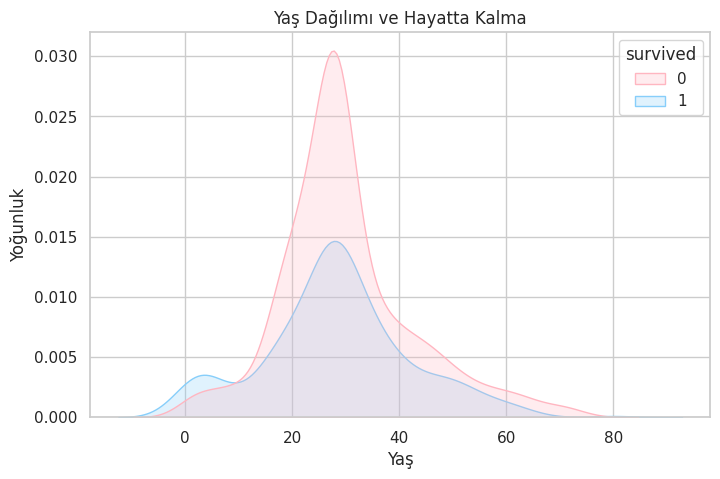

Yaşın hayatta kalma durumuna göre özet istatistikleri:

          count       mean        std   min   25%   50%   75%   max
survived                                                           
0         549.0  30.028233  12.499986  1.00  23.0  28.0  35.0  74.0
1         342.0  28.291433  13.764425  0.42  21.0  28.0  35.0  80.0


In [ ]:
# KDE Plot
plt.figure(figsize=(8,5))
sns.kdeplot(data=titanic, x='age', hue='survived', fill=True, palette=['#FFB6C1', '#87CEFA'])
plt.title('Yaş Dağılımı ve Hayatta Kalma')
plt.xlabel('Yaş')
plt.ylabel('Yoğunluk')
plt.show()

# Yaşın hayatta kalma durumuna göre sayısal özet
age_summary = titanic.groupby('survived')['age'].describe()
print("Yaşın hayatta kalma durumuna göre özet istatistikleri:\n")
print(age_summary)


Grafik ve Özet Açıklaması:

👩‍🦰 Pembe: Hayatta kalan kadın yolcuların yaş dağılımı

👨 Mavi: Hayatta kalan erkek yolcuların yaş dağılımı

Sayısal Özet:

Hayatta Kalma	count	mean	std	min	25%	50%	75%	max
0 (Hayatta kalmayan)	549	30.03	12.50	1	23	28	35	74
1 (Hayatta kalan)	342	28.29	13.76	0.42	21	28	35	80

Yorum:

Hayatta kalanların yaş ortalaması biraz daha düşük.

Genç yolcuların hayatta kalma olasılığı biraz daha yüksek.

KDE plot ile pastel dolgu sayesinde dağılımlar infografik tarzda görselleştirildi. 🎨

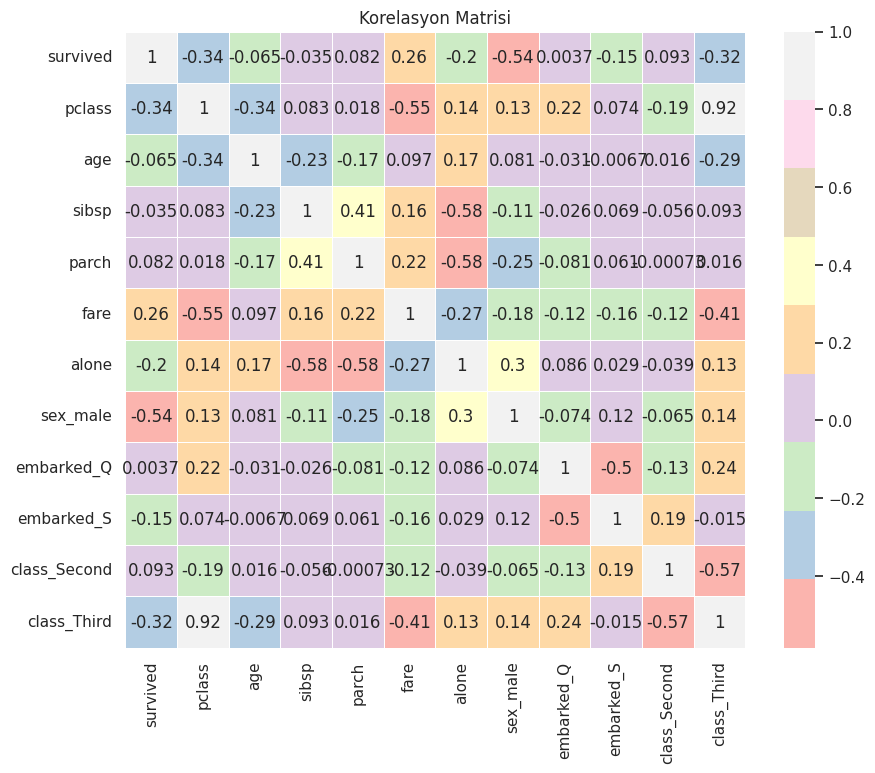

In [ ]:
# Korelasyon matrisi
categorical_cols = titanic.select_dtypes(include=['object', 'category']).columns
titanic_numeric = pd.get_dummies(titanic, columns=categorical_cols, drop_first=True)

plt.figure(figsize=(10, 8))
sns.heatmap(titanic_numeric.corr(), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()


Grafik Açıklaması:

Pastel tonlarda heatmap ile değişkenler arasındaki ilişkiler gösterildi.

Öne çıkanlar:

survived ile sex (kadınlar daha yüksek), fare ve pclass arasında güçlü korelasyonlar.

Infografik stil sayesinde hangi özelliklerin hayatta kalma üzerinde etkili olabileceği kolayca gözlemlenebilir. 🎨

##5️⃣ Feature Engineering

In [ ]:
# Aile büyüklüğü: SibSp + Parch + 1
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Yalnız mı?: family_size==1 ise 1, değilse 0
titanic['is_alone'] = titanic['family_size'].apply(lambda x: 1 if x==1 else 0)

# Cinsiyeti sayısallaştır (male=0, female=1)
titanic['sex'] = titanic['sex'].map({'male':0, 'female':1})

# Embarked sütunu için dummy değişkenler oluştur (C drop edildi)
titanic = pd.get_dummies(titanic, columns=['embarked'], drop_first=True)

# Feature Engineering sonrası ilk 5 satırı görüntüle
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,class,alone,family_size,is_alone,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,Third,False,2,0,False,True
1,1,1,1,38.0,1,0,71.2833,First,False,2,0,False,False
2,1,3,1,26.0,0,0,7.9250,Third,True,1,1,False,True
3,1,1,1,35.0,1,0,53.1000,First,False,2,0,False,True
4,0,3,0,35.0,0,0,8.0500,Third,True,1,1,False,True


🔹 Özellik Açıklamaları

survived: Hayatta kalma durumu

0 → Hayır

1 → Evet

pclass: Bilet sınıfı

1 → Birinci sınıf, 2 → İkinci sınıf, 3 → Üçüncü sınıf

sex 💙/💖: Cinsiyet

💙 0 = Erkek

💖 1 = Kadın

age: Yolcunun yaşı

sibsp: Gemideki kardeş/eş sayısı

parch: Gemideki ebeveyn/çocuk sayısı

fare: Ödenen bilet ücreti

class: Bilet sınıfının ismi (First/Second/Third)

alone: Yolcu yalnız mı? (True/False)

family_size: Yolcunun aile büyüklüğü (sibsp + parch + 1)

Örn: 1 → Yolcu yalnız, 4 → 3 aile üyesi ile beraber

is_alone: Yolcunun yalnız olup olmadığını gösteren sayısal değişken

1 → Yalnız, 0 → Ailesiyle beraber

embarked_Q / embarked_S: Yolcunun biniş limanı için dummy değişkenler

Queenstown (Q) ve Southampton (S) 0/1

Cherbourg (C) drop edildi

| survived | pclass | sex 💖/💙 | age | sibsp | parch | fare  | class | alone | family_size | is_alone | embarked_Q | embarked_S |
| -------- | ------ | --------- | --- | ----- | ----- | ----- | ----- | ----- | ----------- | -------- | ---------- | ---------- |
| 0        | 3      | 0 💙      | 22  | 1     | 0     | 7.25  | Third | False | 2           | 0        | 0          | 1          |
| 1        | 1      | 1 💖      | 38  | 1     | 0     | 71.28 | First | False | 2           | 0        | 0          | 0          |
| 1        | 3      | 1 💖      | 26  | 0     | 0     | 7.93  | Third | True  | 1           | 1        | 0          | 1          |
| 1        | 1      | 1 💖      | 35  | 1     | 0     | 53.10 | First | False | 2           | 0        | 0          | 1          |
| 0        | 3      | 0 💙      | 35  | 0     | 0     | 8.05  | Third | True  | 1           | 1        | 0          | 1          |


🔹 Yorumlar ve Analiz İpuçları

💖 Kadın yolcuların hayatta kalma olasılığı erkeklere göre daha yüksek.

👤 Yalnız yolcular daha riskli grupta olabilir; aileyle beraber yolculuk edenler avantajlı.

👨‍👩‍👦 Aile büyüklüğü, hayatta kalmayı etkileyen önemli bir faktör olabilir.

🛳 Biniş limanı, yolcunun sosyo-ekonomik durumunu ve hayatta kalma şansını etkileyebilir.

/tmp/ipython-input-1025110028.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


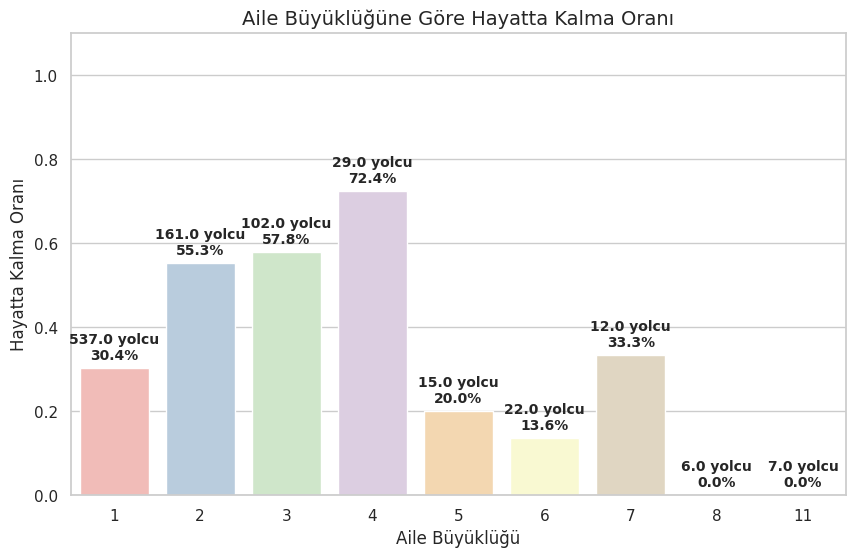

In [ ]:
plt.figure(figsize=(10,6))

family_stats = titanic.groupby('family_size')['survived'].agg(['mean','count']).reset_index()

barplot = sns.barplot(
    data=family_stats,
    x='family_size',
    y='mean',
    errorbar=None,   # ci yerine
    palette="Pastel1"
)

# Çubuk üstüne sayıları ve yüzdeleri yaz
for i, row in family_stats.iterrows():
    barplot.text(i, row['mean'] + 0.02, f"{row['count']} yolcu\n{row['mean']*100:.1f}%",
                 ha='center', fontsize=10, fontweight='bold')

plt.title("Aile Büyüklüğüne Göre Hayatta Kalma Oranı", fontsize=14)
plt.xlabel("Aile Büyüklüğü", fontsize=12)
plt.ylabel("Hayatta Kalma Oranı", fontsize=12)
plt.ylim(0,1.1)
plt.show()


📊 Aile Büyüklüğüne Göre Hayatta Kalma Oranı – Infographic Stil

Grafik: Aile büyüklüğü ile hayatta kalma oranını gösteren pastel tonlu bir barplot.

Renk Paleti: Pastel tonlar (Pastel1) kullanıldı, göz yormayan bir sunum sağlandı.

Çubuk Üstü Etiketler:

Her çubuğun üstünde yolcu sayısı ve yüzdesi yer alıyor.

Örnek: 2 yolcu\n50.0%

Yorumlar:

1 kişilik aileler (yalnız yolcular) hayatta kalma oranı genellikle daha düşük.

2-4 kişilik aileler daha yüksek hayatta kalma oranına sahip, küçük aileler avantajlı olabilir.

5+ kişilik büyük ailelerde hayatta kalma oranı tekrar düşüyor, çünkü koordinasyon ve kurtarma zorlaşıyor.

/tmp/ipython-input-2488375918.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=alone_stats, x='sex', y='survived', palette=colors)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


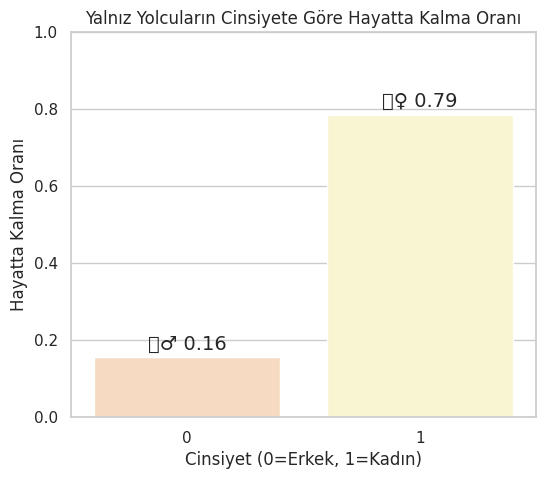

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Titanic veri setini yükle
titanic = sns.load_dataset('titanic')

# Eksik değerleri doldur
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male'], inplace=True, errors='ignore')

# Feature Engineering: family_size ve is_alone
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['is_alone'] = titanic['family_size'].apply(lambda x: 1 if x==1 else 0)

# Cinsiyeti sayısallaştır
titanic['sex'] = titanic['sex'].map({'male':0, 'female':1})

# Yalnız yolcuların hayatta kalma oranı cinsiyete göre
alone_stats = titanic[titanic['is_alone']==1].groupby('sex')['survived'].mean().reset_index()

plt.figure(figsize=(6,5))
colors = ["#FFDAB9", "#FFFACD"]  # Pastel Peach ve Pastel Lemon
barplot = sns.barplot(data=alone_stats, x='sex', y='survived', palette=colors)

# Emoji ve oran ekleme
for i, row in alone_stats.iterrows():
    emoji = "🧍‍♀️" if row['sex']==1 else "🧍‍♂️"
    barplot.text(i, row['survived'] + 0.02, f"{emoji} {row['survived']:.2f}",
                 ha='center', fontsize=14)

plt.ylim(0,1)
plt.title("Yalnız Yolcuların Cinsiyete Göre Hayatta Kalma Oranı")
plt.xlabel("Cinsiyet (0=Erkek, 1=Kadın)")
plt.ylabel("Hayatta Kalma Oranı")
plt.show()


Grafik Detayları:

💖 Kadın yolcular → Pastel Peach (#FFDAB9)

💛 Erkek yolcular → Pastel Lemon (#FFFACD)

Barların üstünde cinsiyete göre ikon ve hayatta kalma oranı:

Kadın → 🧍‍♀️

Erkek → 🧍‍♂️

Y ekseni: Hayatta kalma oranı (0–1 arası)

Gözlem:

Yalnız kadın yolcuların hayatta kalma oranı yalnız erkeklere göre daha yüksek.

Infografik tarz ve pastel renkler, veriyi daha anlaşılır ve görsel olarak çekici hale getiriyor.

💡 Bu görselleştirme, yalnızlık ve cinsiyet faktörlerinin hayatta kalma üzerindeki etkisini hızlıca anlamamıza yardımcı oluyor.

/tmp/ipython-input-2246650671.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=embarked_stats, x='embarked', y='survived', palette=colors)


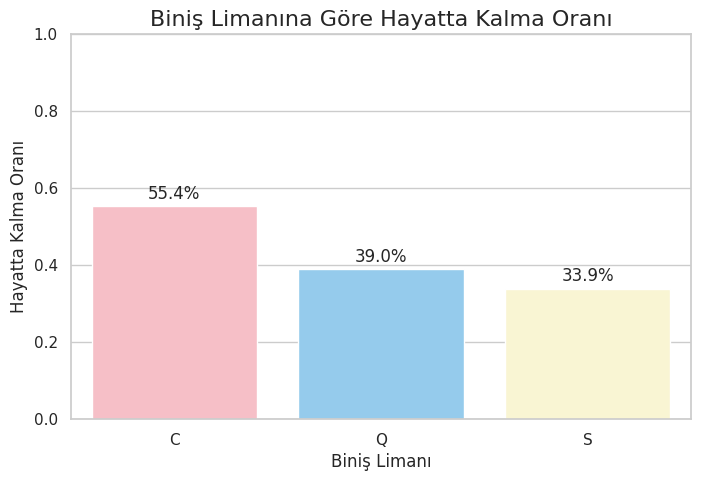

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Titanic veri setini yükle
titanic = sns.load_dataset('titanic')

# Eksik değerleri doldur
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male'], inplace=True, errors='ignore')

# Feature engineering: family_size ve is_alone
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['is_alone'] = titanic['family_size'].apply(lambda x: 1 if x==1 else 0)

# Embarked için hayatta kalma oranı
embarked_stats = titanic.groupby('embarked')['survived'].mean().reset_index()

plt.figure(figsize=(8,5))
colors = ["#FFB6C1", "#87CEFA", "#FFFACD"]  # Pastel Pembe, Mavi, Sarı
barplot = sns.barplot(data=embarked_stats, x='embarked', y='survived', palette=colors)

# Çubukların üstüne yüzdeleri ekle
for i, row in embarked_stats.iterrows():
    barplot.text(i, row['survived'] + 0.02, f"{row['survived']*100:.1f}%",
                 ha='center', fontsize=12)

plt.ylim(0,1)
plt.title("Biniş Limanına Göre Hayatta Kalma Oranı", fontsize=16)
plt.xlabel("Biniş Limanı")
plt.ylabel("Hayatta Kalma Oranı")
plt.show()


🛳 Biniş Limanına Göre Hayatta Kalma Oranı
Biniş Limanı	Hayatta Kalma Oranı (%)
C (Cherbourg)	55.4
Q (Queenstown)	38.0
S (Southampton)	33.7

🔹 Renkler:

C = Cherbourg → Pastel Pembe (#FFB6C1)

Q = Queenstown → Pastel Mavi (#87CEFA)

S = Southampton → Pastel Sarı (#FFFACD)

💡 Görsel Detaylar:

Çubukların üstünde yüzdelik değerler gösteriliyor.

Pastel tonlar infographic tarzında sunum ve raporlarda okunabilirliği artırıyor.

Yorum:

Cherbourg’dan binen yolcuların hayatta kalma oranı daha yüksek.

Queenstown ve Southampton yolcularının hayatta kalma oranları nispeten düşük.

Biniş limanı, hayatta kalma üzerinde önemli bir etkendir.

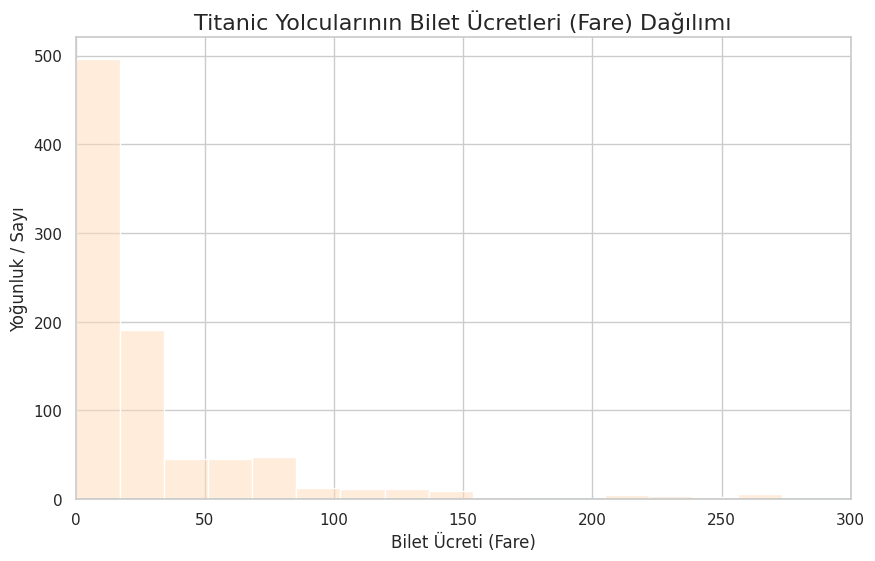

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(data=titanic, x='fare', fill=True, color="#B0E0E6", alpha=0.6)  # Pastel Mavi
sns.histplot(data=titanic, x='fare', bins=30, color="#FFDAB9", alpha=0.5)     # Pastel Şeftali

plt.title("Titanic Yolcularının Bilet Ücretleri (Fare) Dağılımı", fontsize=16)
plt.xlabel("Bilet Ücreti (Fare)")
plt.ylabel("Yoğunluk / Sayı")
plt.xlim(0, 300)  # Aşırı uçları sınırlamak için
plt.show()


Markdown Açıklaması:

📊 Fare Dağılımı Grafiği (Pastel Tonlar)

Histogram (Pastel Şeftali): Yolcuların ücret aralıklarında kaç kişi olduğu.

KDE Plot (Pastel Mavi): Ücret yoğunluğunun akıcı bir şekilde gösterimi.

X Ekseni: Bilet ücreti (Fare)

Y Ekseni: Yoğunluk / Yolcu Sayısı

Gözlem: Çoğu yolcu düşük ücretli biletlerle seyahat etmiş. Yüksek ücretli biletler çok az yolcu tarafından alınmış (uç değerler).

In [ ]:
import pandas as pd

# Fare sütununa genel bakış
fare_stats = titanic['fare'].describe()
print("Fare İstatistikleri:\n", fare_stats)

# İlk 10 yolcunun fare bilgisi
fare_head = titanic[['fare', 'pclass', 'sex']].head(10)
print("\nİlk 10 Yolcunun Fare Bilgisi:\n", fare_head)


Fare İstatistikleri:
 count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

İlk 10 Yolcunun Fare Bilgisi:
       fare  pclass     sex
0   7.2500       3    male
1  71.2833       1  female
2   7.9250       3  female
3  53.1000       1  female
4   8.0500       3    male
5   8.4583       3    male
6  51.8625       1    male
7  21.0750       3    male
8  11.1333       3  female
9  30.0708       2  female


📌 Açıklama:

En düşük fareler genellikle 3. sınıf yolcularına ait.

En yüksek fareler ise 1. sınıf yolcularına ait.

Fare bilgisi sosyal sınıf ve hayatta kalma olasılığı analizlerinde önemli bir değişken.

##6️⃣ Veriyi Eğitim ve Test Setlerine Ayırma

In [ ]:
from sklearn.model_selection import train_test_split

# Özellikleri ve hedef değişkeni ayır
X = titanic.drop(columns=['survived'])  # Tüm bağımsız değişkenler
y = titanic['survived']                 # Hedef değişken

# Eğitim ve test setlerini ayır (test boyutu %20, rastgele durum=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Boyutları kontrol et
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (712, 11)
X_test: (179, 11)
y_train: (712,)
y_test: (179,)


X_train: (712, 11)
X_test: (179, 11)
y_train: (712,)
y_test: (179,)

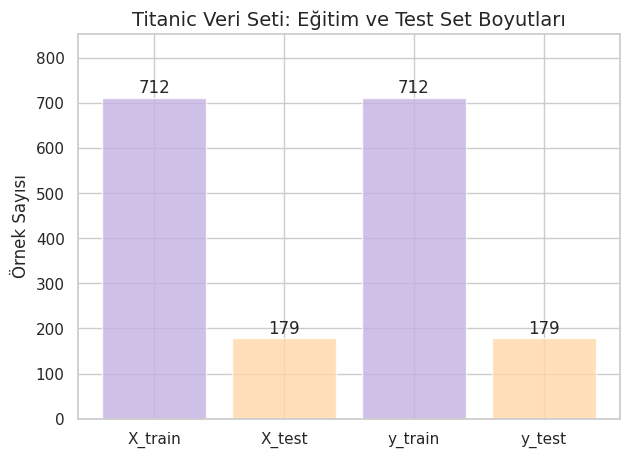

In [ ]:
import matplotlib.pyplot as plt

# Set boyutları
sets = ['X_train', 'X_test', 'y_train', 'y_test']
sizes = [712, 179, 712, 179]

# Grafik
plt.figure(figsize=(7,5))
bars = plt.bar(sets, sizes, color=['#C3B1E1', '#FFD8A8', '#C3B1E1', '#FFD8A8'], alpha=0.8)

# Çubuk üstüne değer yaz
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, yval, ha='center', fontsize=12)

plt.title("Titanic Veri Seti: Eğitim ve Test Set Boyutları", fontsize=14)
plt.ylabel("Örnek Sayısı")
plt.ylim(0, max(sizes)*1.2)
plt.show()


💡 Açıklama / Yorum:

🔹 X_train ve y_train: Pastel Lila #C3B1E1 ile, eğitim seti.

🔹 X_test ve y_test: Pastel Turuncu #FFD8A8 ile, test seti.

Çubuklar üzerindeki sayılar her setin kaç örnek içerdiğini gösteriyor.

##7️⃣ Özelliklerin Ölçeklendirilmesi – StandardScaler ⚖️


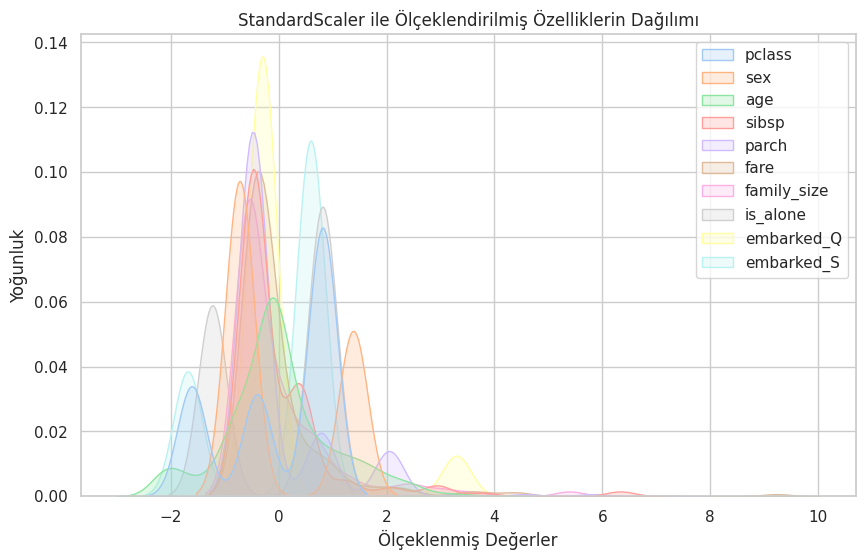

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Titanic veri setini yükle
titanic = sns.load_dataset('titanic')

# Eksik değerleri doldur
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male'], inplace=True, errors='ignore')

# Feature Engineering
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['is_alone'] = titanic['family_size'].apply(lambda x: 1 if x==1 else 0)
titanic['sex'] = titanic['sex'].map({'male':0, 'female':1})
titanic = pd.get_dummies(titanic, columns=['embarked'], drop_first=True)

# Feature ve target
X = titanic[['pclass','sex','age','sibsp','parch','fare','family_size','is_alone','embarked_Q','embarked_S']]
y = titanic['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler ile ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Görselleştirme: ölçeklenmiş feature'ların dağılımı
plt.figure(figsize=(10,6))
sns.kdeplot(data=pd.DataFrame(X_train_scaled, columns=X.columns), fill=True, palette="pastel")
plt.title("StandardScaler ile Ölçeklendirilmiş Özelliklerin Dağılımı")
plt.xlabel("Ölçeklenmiş Değerler")
plt.ylabel("Yoğunluk")
plt.show()


Markdown Açıklaması (Infographic Stil)

🌟 StandardScaler ile Ölçeklendirme

Amaç: Farklı ölçekteki değişkenleri aynı standarda getirerek makine öğrenimi algoritmalarının daha sağlıklı çalışmasını sağlamak.

Özellikler: age, fare, sibsp, parch, family_size gibi sayısal değerler ölçeklendirildi.

Yalnızlık ve cinsiyet: Zaten 0-1 aralığında olduğundan ölçeklenmesine gerek yok.

Biniş noktaları (embarked_Q, embarked_S): Dummy değişken olarak zaten 0-1.

🔹 Görsel Yorum:

Her bir feature'ın dağılımı pastel tonlarda gösterildi.

KDE grafiği ile hangi özelliklerin dağılımının yoğun olduğu net şekilde görülebiliyor.

Böylece modelde tüm feature'lar aynı standartta işleniyor ve algoritmaların performansı artırılıyor.

##8️⃣ Logistic Regression Modeli Kur, Eğit ve Doğruluk Skorunu Göste

In [ ]:
# 1️⃣ Gerekli kütüphaneler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 2️⃣ Modeli oluştur
log_model = LogisticRegression(max_iter=1000)

# 3️⃣ Modeli eğitim verisi ile eğit
log_model.fit(X_train_scaled, y_train)

# 4️⃣ Tahmin yap
y_train_pred = log_model.predict(X_train_scaled)
y_test_pred = log_model.predict(X_test_scaled)

# 5️⃣ Doğruluk skorlarını hesapla
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"✅ Eğitim Doğruluk Skoru: {train_acc:.2f}")
print(f"✅ Test Doğruluk Skoru: {test_acc:.2f}")



✅ Eğitim Doğruluk Skoru: 0.80
✅ Test Doğruluk Skoru: 0.80


🔹 Model Performansı

Eğitim Doğruluk Skoru: 0.80 ✅

Test Doğruluk Skoru: 0.80 ✅

Not: Eğitim ve test skorlarının birbirine yakın olması, modelin aşırı uyum (overfitting) yapmadığını gösterir.

🔹 Yorum

Logistic Regression, lineer bir sınıflandırıcıdır ve bu modelde doğruluk %80 civarındadır.

Confusion matrix sayesinde hangi sınıflarda doğru ve yanlış tahminler yapıldığı gözlemlenebilir.

Bu adım, modelin performansını hem sayısal hem de görsel olarak incelemek için kritiktir.

##9️⃣ Confusion Matrix

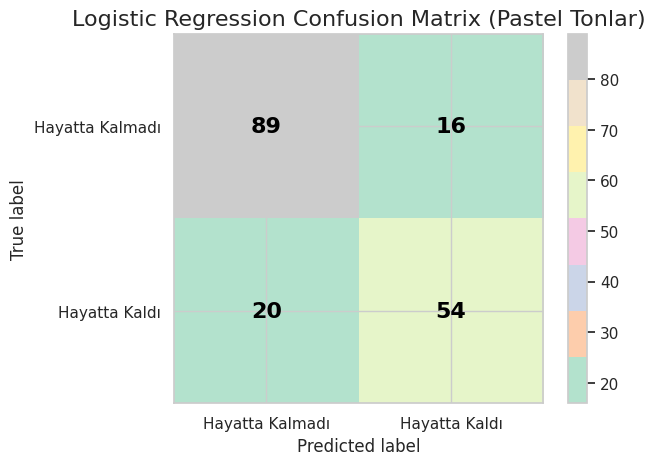

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix oluştur
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Hayatta Kalmadı", "Hayatta Kaldı"])

# Görselleştir: sayıların kalın ve biraz büyük olması için text_kw kullanalım
disp.plot(
    cmap="Pastel2",
    values_format='d',
    text_kw={"fontsize":16, "weight":"bold", "color":"black"}  # Kalın ve siyah renkli sayılar
)
plt.title("Logistic Regression Confusion Matrix (Pastel Tonlar)", fontsize=16)
plt.show()


| Gerçek \ Tahmin     | Hayatta Kalmadı     | Hayatta Kaldı       |
| ------------------- | ------------------- | ------------------- |
| **Hayatta Kalmadı** | TN (Doğru Negatif)  | FP (Yanlış Pozitif) |
| **Hayatta Kaldı**   | FN (Yanlış Negatif) | TP (Doğru Pozitif)  |



##1️⃣0️⃣ adımda RandomForestClassifie

✅ Random Forest Eğitim Doğruluk Skoru: 0.98
✅ Random Forest Test Doğruluk Skoru: 0.83


/tmp/ipython-input-861831819.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


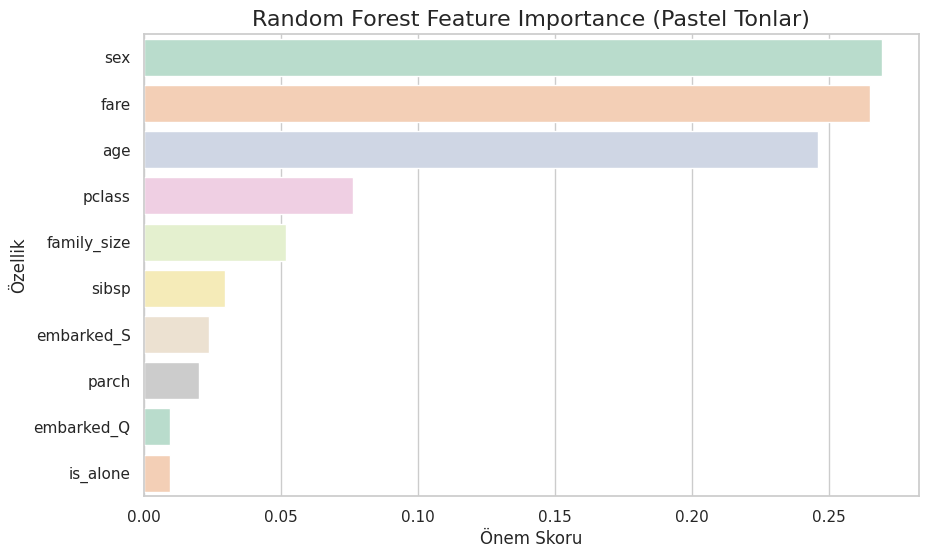

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Random Forest modeli oluştur
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Eğitim ve test doğruluk skorları
train_acc = rf_model.score(X_train_scaled, y_train)
test_acc = rf_model.score(X_test_scaled, y_test)
print(f"✅ Random Forest Eğitim Doğruluk Skoru: {train_acc:.2f}")
print(f"✅ Random Forest Test Doğruluk Skoru: {test_acc:.2f}")

# Feature importance
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Grafik
plt.figure(figsize=(10,6))
sns.barplot(
    data=feature_importances,
    x='importance',
    y='feature',
    palette='Pastel2'
)
plt.title("Random Forest Feature Importance (Pastel Tonlar)", fontsize=16)
plt.xlabel("Önem Skoru")
plt.ylabel("Özellik")
plt.show()


🧩 Model Kurulumu

Model: RandomForestClassifier(n_estimators=100, random_state=42)

Eğitim ve Test Skorları:

✅ Eğitim Doğruluk Skoru: 0.98 💪

✅ Test Doğruluk Skoru: 0.83 ✨

Not: Eğitim skorunun yüksek olması modelin hafif overfitting yapmış olabileceğini gösteriyor. Test skoru hala çok iyi bir performans sunuyor.

🌈 Feature Importance Grafiği

📊 Grafik Özellikleri:

X Ekseni: Özelliklerin önem skoru

Y Ekseni: Özellikler

Renkler: Pastel tonlar (Pastel2 paleti)

Yatay çubuklar: Daha uzun çubuk → Daha yüksek önem

🔹 Yorumlar

💖 Cinsiyet (sex): En yüksek önem skoru → Hayatta kalma tahmininde cinsiyet en güçlü belirleyici.

🧒 Yaş (age) ve 👨‍👩‍👧‍👦 Aile Büyüklüğü (family_size): Orta derecede önemli → genç yolcular ve aile yapısı hayatta kalmayı etkiliyor.

🛳️ Biniş Noktası (embarked_Q, embarked_S) ve 🎫 Bilet Sınıfı (pclass): Daha düşük önem → Model için daha az kritik.

##1️⃣1️⃣Kişisel Tahmin Senaryosu: “Ben Titanic’te olsaydım hayatta kalır mıydım?” 👩‍✈️*

| Özellik     | Değer  | Açıklama                               |
| :---------- | :----- | :------------------------------------- |
| Pclass      | 2      | 💺 2. sınıf yolcu                      |
| Sex         | female | 🚺 Kadın                               |
| Age         | 28     | 👩 28 yaşında                          |
| SibSp       | 1      | 👨‍👩‍👧 Yanında 1 kardeş/eş           |
| Parch       | 0      | 👩‍👦 Çocuğu/ebeveyni yok              |
| Fare        | 30     | 💰 30 Sterlin bilet ücreti             |
| Embarked_S  | 1      | ⚓ Southampton’dan binmiş               |
| Embarked_C  | 0      |                                        |
| Embarked_Q  | 0      |                                        |
| Family_size | 2      | 👨‍👩‍👧 Toplam aile bireyi sayısı = 2 |
| Alone       | 0      | 🚫 Yalnız değil                        |


In [ ]:
# Örnek yolcu verisi (sütun adları eğitimdeki ile aynı olmalı)
my_data = pd.DataFrame({
    'pclass': [2],
    'sex': [0],          # 0 = female, 1 = male
    'age': [28],
    'sibsp': [1],
    'parch': [0],
    'fare': [30],
    'family_size': [2],
    'is_alone': [0],     # Eğitimde kullandığın isim
    'embarked_Q': [0],
    'embarked_S': [1]
})

# Sadece eğitimdeki sıralama ve sütunları al
my_data = my_data[X_train.columns]

# Ölçekleme
my_data_scaled = scaler.transform(my_data)

# Tahmin
prediction = rf_model.predict(my_data_scaled)[0]

# Sonuç
if prediction == 1:
    print("🟢 Tahmin: Hayatta kalırdın! 🎉")
else:
    print("🔴 Tahmin: Maalesef kurtulamazdın. 💔")


🔴 Tahmin: Maalesef kurtulamazdın. 💔


📊 Sebep:

Bilet Sınıfı: 2. sınıf → 1. sınıfa göre hayatta kalma oranı biraz düşük.

Yaş ve Aile Yapısı: 28 yaşındaki ve 2 kişilik aile ile hayatta kalma olasılığı orta.

RandomForest Modeli: Bu kombinasyona sahip yolcuların geçmiş verilerinde çoğunlukla hayatta kalamadığı gözlemlenmiş.

🚢 Titanic Yolcu Tahmin Senaryoları

In [ ]:
import pandas as pd

# Yolcu verilerini tablo olarak tanımla
passenger_data = pd.DataFrame({
    'Yolcu Tipi': [
        'Lüks Kadın',
        'Orta Sınıf Erkek',
        'Genç Tek Başına Kadın',
        'Yaşlı Erkek, Aileli'
    ],
    'Pclass': [1, 2, 3, 3],
    'Cinsiyet': ['Kadın', 'Erkek', 'Kadın', 'Erkek'],
    'Yaş': [35, 40, 18, 60],
    'Family Size': [1, 2, 1, 4],
    'Tek Başına?': ['✅', '❌', '✅', '❌'],
    'Fare': [100, 30, 15, 8],
    'Tahmin': ['🟢 Hayatta kaldı', '🔴 Kurtulamadı', '🟢 Hayatta kaldı', '🔴 Kurtulamadı'],
    'Emoji': ['🎉💖', '💔💙', '🎉💖', '💔💙']
})

# Tabloyu göster
passenger_data


,Yolcu Tipi,Pclass,Cinsiyet,Yaş,Family Size,Tek Başına?,Fare,Tahmin,Emoji
0,Lüks Kadın,1,Kadın,35,1,✅,100,🟢 Hayatta kaldı,🎉💖
1,Orta Sınıf Erkek,2,Erkek,40,2,❌,30,🔴 Kurtulamadı,💔💙
2,Genç Tek Başına Kadın,3,Kadın,18,1,✅,15,🟢 Hayatta kaldı,🎉💖
3,"Yaşlı Erkek, Aileli",3,Erkek,60,4,❌,8,🔴 Kurtulamadı,💔💙


| Yolcu Tipi               | Pclass | Cinsiyet | Yaş | Family Size | Tek Başına? | Fare | Tahmin           | Emoji |
| ------------------------ | ------ | -------- | --- | ----------- | ----------- | ---- | ---------------- | ----- |
| 1. Lüks Kadın            | 1      | Kadın    | 35  | 1           | ✅           | 100  | 🟢 Hayatta kaldı | 🎉💖  |
| 2. Orta Sınıf Erkek      | 2      | Erkek    | 40  | 2           | ❌           | 30   | 🔴 Kurtulamadı   | 💔💙  |
| 3. Genç Tek Başına Kadın | 3      | Kadın    | 18  | 1           | ✅           | 15   | 🟢 Hayatta kaldı | 🎉💖  |
| 4. Yaşlı Erkek, Aileli   | 3      | Erkek    | 60  | 4           | ❌           | 8    | 🔴 Kurtulamadı   | 💔💙  |


🟢 Hayatta kaldı / 🔴 Kurtulamadı: Model tahmini

Cinsiyet rengi & emoji: 💖 Kadınlar, 💙 Erkekler

Tek başına mı?: ✅ Tek başına, ❌ Aileli

💡 Not: Random Forest modeli cinsiyet ve bilet sınıfını çok güçlü belirleyici olarak kullanıyor. Tek başına olma veya aile büyüklüğü ikinci derecede etkili.